In [1]:
import pandas as pd
import numpy as np
import os
import math, random, csv

In [99]:
def convert_score_to_numerical(fulltime_scores):
    if fulltime_scores[0] > fulltime_scores[1]:
        return 1
    elif fulltime_scores[0] == fulltime_scores[1]:
        return 0
    else:
        return -1
    
def hometeam_gd(fulltime_scores):
    return (fulltime_scores[0] - fulltime_scores[1])

def awayteam_gd(fulltime_scores):
    return (fulltime_scores[1] - fulltime_scores[0])

In [100]:
year2014 = pd.read_csv(os.getcwd() + '/Data/2014-15Season.csv')
year2015 = pd.read_csv(os.getcwd() + '/Data/2015-16Season.csv')
year2016 = pd.read_csv(os.getcwd() + '/Data/2016-17Season.csv')
year2017 = pd.read_csv(os.getcwd() + '/Data/2017-18Season.csv')
year2018 = pd.read_csv(os.getcwd() + '/Data/2018-19Season.csv')
year2014['Year'] = 2014
year2015['Year'] = 2015
year2016['Year'] = 2016
year2017['Year'] = 2017
year2018['Year'] = 2018

year2014 = pd.DataFrame(year2014)
year2015 = pd.DataFrame(year2015)
year2016 = pd.DataFrame(year2016)
year2017 = pd.DataFrame(year2017)
year2018 = pd.DataFrame(year2018)

frames = [year2014, year2015, year2016, year2017, year2018]

df = pd.concat(frames)
# df['Hometeam Goal Diff'] = df[['Hometeam Score', 'Awayteam Score']].apply(hometeam_gd, axis=1)
# df['Awayteam Goal Diff'] = df[['Hometeam Score', 'Awayteam Score']].apply(awayteam_gd, axis=1)
df['target'] = df[['Hometeam Score', 'Awayteam Score']].apply(convert_score_to_numerical, axis=1)
df

# year2019 = pd.read_csv(os.getcwd() + '/Data/2019-20Season.csv')
# data['target'] = data[['Hometeam Score', 'Awayteam Score']].apply(convert_score_to_numerical, axis=1)
# df = pd.DataFrame(data)
# df

Match_ID                 Hometeam                  Awayteam  \
0        9981                  Arsenal      West Bromwich Albion   
1        9982              Aston Villa                   Burnley   
2        9983                  Chelsea                Sunderland   
3        9984           Crystal Palace              Swansea City   
4        9985                  Everton         Tottenham Hotspur   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             63.7             36.3   
1                 0               1             63.3             36.7   
2                 3               1             64.6             35.4   
3                 1               0             47.4             52.6   
4                 0               1             40.4             59.6   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                      13                     5                24  ...   
1                       5                     3                17  ...   
2                       8                     9                24  ...   
3                       7                     2                13  ...   
4                       1                     3                 9  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                1              3                  1                  0   
1                1              1                  1                  2   
2                1              1                  2                  1   
3                2              0                  3                  0   
4                2              4                  1                  2   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  \
0                 0               0                    6                    7   
1                 0               0                   11                    6   
2                 0               0                   12                    8   
3                 0               0                   22                   13   
4                 0               0                   12                    8   
..              ...             ...

In [101]:
dropped_df = df.drop(columns=['Match_ID', 'Hometeam','Awayteam','Hometeam Score', 'Awayteam Score', 'Year', 'target'])
dropped_df

Home_Possession  Away_Possession  Home_Shots_on_target  \
0               63.7             36.3                    13   
1               63.3             36.7                     5   
2               64.6             35.4                     8   
3               47.4             52.6                     7   
4               40.4             59.6                     1   
..               ...              ...                   ...   
375             66.3             33.7                     6   
376             37.2             62.8                     1   
377             53.2             46.8                     5   
378             57.4             42.6                     4   
379             46.3             53.7                     6   

     Away_Shots_on_target  Home_Total_Shots  Away_Total_Shots  Home_Touches  \
0                       5                24                14           637   
1                       3                17                 6           530   
2                       9                24                17           617   
3                       2                13                 5           342   
4                       3                 9                16           409   
..                    ...               ...               ...           ...   
375                    10                15                12           672   
376                     4                 6                13           372   
377                     0                19                 6           437   
378                     5                11                 8           547   
379                     4                 8                13           485   

     Away_Touches  Home_Passes  Away_Pasees  ...  Home_Corners  Away_Corners  \
0             359          637          359  ...             7             3   
1             319          530          319  ...             7             2   
2             342          617          342  ...            11             3   
3             389          342          389  ...             7             3   
4             624          409          624  ...             3             5   
..            ...          ...          ...  ...           ...           ...   
375           347          672          347  ...             5             5   
376           658          372          658  ...             2             5   
377           385          437          385  ...             8             2   
378           409          547          409  ...             3             6   
379           543          485          543  ...             2             5   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                1              3                  1                  0   
1                1              1                  1                  2   
2                1              1                  2                  1   
3                2              0                  3                  0   
4                2              4                  1                  2   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  
0                 0               0                    6                    7  
1                 0               0                   11                    6  
2                 0               0                   12                    8  
3                 0               0                   22                   13  
4                 0               0  

In [102]:
def gd_vectors(scores):
    """
    Calculate the goal difference of the each game from the perspective of the
    home team, for use in form calcluations.
    """
    gd_dict = {}
    for game in scores:
        # goal difference from the perspective of the home team
        id, home_team, away_team, home_goals, away_goals = game
        score = home_goals - away_goals
        gd_dict[home_team] = gd_dict.get(home_team, []) + [(id, score)]
        gd_dict[away_team] = gd_dict.get(away_team, []) + [(id,-1 * score)]
    return gd_dict

In [103]:
scores = df[['Match_ID', 'Hometeam', 'Awayteam', 'Hometeam Score', 'Awayteam Score']].values
gd = gd_vectors(scores)
gd

{'Arsenal': [(9981, 3),
  (9980, 0),
  (9977, 0),
  (9969, -1),
  (9959, 2),
  (9946, 0),
  (9921, 1),
  (9910, 3),
  (9902, 1),
  (9890, 3),
  (9885, 1),
  (9877, 2),
  (9863, 1),
  (9851, 1),
  (9847, -1),
  (9839, 5),
  (9828, 2),
  (9819, 3),
  (9807, -2),
  (9799, 1),
  (9781, 1),
  (9778, 0),
  (9761, 3),
  (9756, -1),
  (9747, 1),
  (9737, 1),
  (9721, -1),
  (9718, -1),
  (9701, 3),
  (9693, 2),
  (9681, 0),
  (9677, -2),
  (9661, 0),
  (9651, 3),
  (9641, 0),
  (9639, 0),
  (9624, 0),
  (9611, 1),
  (12485, 4),
  (12479, 0),
  (12461, 1),
  (12459, 0),
  (12453, 2),
  (12445, 0),
  (12434, 0),
  (12418, 4),
  (12410, 2),
  (12399, 0),
  (12388, -1),
  (12381, -1),
  (12372, 1),
  (12363, 2),
  (12345, 0),
  (12343, -1),
  (12333, 0),
  (12319, 0),
  (12305, 1),
  (12295, 2),
  (12291, -4),
  (12284, 1),
  (12271, 2),
  (12255, 2),
  (12252, 0),
  (12242, -1),
  (12232, 0),
  (12219, 3),
  (12205, 1),
  (12201, 3),
  (12192, 3),
  (12175, 3),
  (12167, -2),
  (12155, 2),
  (121

In [104]:
def exponential_momentum(matchID, team, gd_vectors, alpha, boolean = True):
    """
    Calculate an exponentially-decaying weight of a team's recent performance
    which places more emphasis on recent result.
    """
    if alpha > .69:
        raise ValueError
    avg_vec, i = [], 1
    while sum(avg_vec) < 1:
        avg_vec.append( math.e ** (-1 * (alpha * i)) )
        i += 1
    avg_vec = sorted(avg_vec)
    previous_results = get_window(matchID, team, gd_vectors, len(avg_vec), boolean)
    if not previous_results:
        return 0
    return np.dot( np.array(avg_vec), np.array(previous_results) )

def get_window(matchID, team, gd_vectors, window = 5, boolean = False):
    """
    Pull out the window length previous results for the input team. If boolean,
    then simply the win/loss values are added, otherwise goal difference is used.
    """
    team_results = gd_vectors[team]
    idx = -1
    for i, result in enumerate(team_results):
        if result[0] == matchID:
            idx = i
            break
    if idx < window - 1:
        return None
    return [ team_results[i][1] for i in range(idx - window, idx) ]

def linear_momentum(matchID, team, gd_vectors, window = 5, boolean = False):
    """
    Calcluated a linear momentum measure for a team given a history of goal
    difference. Simply, the linear sum of their previous results.
    """
    previous_results = get_window(matchID, team, gd_vectors, window, boolean)
    if not previous_results:
        return 0
    return sum(previous_results)

In [105]:
away_form_linear = []
home_form_linear = []
away_form_exp = []
home_form_exp = []
for game in scores:
    id, home_team, away_team, _, _ = game
    away_form_exp.append( exponential_momentum(id, away_team, gd, alpha = .65) )
    home_form_exp.append( exponential_momentum(id, home_team, gd, alpha = .65) )
    away_form_linear.append( linear_momentum(id, away_team, gd) )
    home_form_linear.append( linear_momentum(id, home_team, gd) )


df_form = df.copy()
df_form['away_form_exp'] = pd.Series(away_form_exp)
df_form['home_form_exp'] = pd.Series(home_form_exp)
list(df_form)

['Match_ID',
 'Hometeam',
 'Awayteam',
 'Hometeam Score',
 'Awayteam Score',
 'Home_Possession',
 'Away_Possession',
 'Home_Shots_on_target',
 'Away_Shots_on_target',
 'Home_Total_Shots',
 'Away_Total_Shots',
 'Home_Touches',
 'Away_Touches',
 'Home_Passes',
 'Away_Pasees',
 'Home_Takles',
 'Away_Takles',
 'Home_Clearance',
 'Away_Clearance',
 'Home_Corners',
 'Away_Corners',
 'Home_Offsides',
 'Away_Offsides',
 'Home_Yellow_Cards',
 'Away_Yellow_Cards',
 'Home_Red_Cards',
 'Away_Red_Cards',
 'Home_Fouls_Conceded',
 'Away_Fouls_Conceded',
 'Year',
 'target',
 'away_form_exp',
 'home_form_exp']

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
clfs = [LogisticRegression(max_iter=10000), RandomForestClassifier(), GradientBoostingClassifier(),
        KNeighborsClassifier()]
df_form

Match_ID                 Hometeam                  Awayteam  \
0        9981                  Arsenal      West Bromwich Albion   
1        9982              Aston Villa                   Burnley   
2        9983                  Chelsea                Sunderland   
3        9984           Crystal Palace              Swansea City   
4        9985                  Everton         Tottenham Hotspur   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             63.7             36.3   
1                 0               1             63.3             36.7   
2                 3               1             64.6             35.4   
3                 1               0             47.4             52.6   
4                 0               1             40.4             59.6   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                      13                     5                24  ...   
1                       5                     3                17  ...   
2                       8                     9                24  ...   
3                       7                     2                13  ...   
4                       1                     3                 9  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Yellow_Cards  Away_Yellow_Cards  Home_Red_Cards  Away_Red_Cards  \
0                    1                  0               0               0   
1                    1                  2               0               0   
2                    2                  1               0               0   
3                    3                  0               0               0   
4                    1                  2               0               0   
..                 ...                ...             ...             ...   
375                  1                  2               0               0   
376                  2                  1               0               0   
377                  2                  2               0               0   
378                  0                  1               0               1   
379                  2                  1               0               0   

     Home_Fouls_Conceded  Away_Fouls_Conceded  Year  target  away_form_exp  \
0                      6                    7  2014       1       0.000000   
1                     11                    6  2014      -1       0.000000   
2                     12                    8  2014       1       0.000000   
3                     22                   13  2014       1       0.000000   
4                     12                    8  2014      -1       0.000000   
..                   ...     

In [108]:
df_form.drop(columns = ['target', 'Match_ID', 'Hometeam', 'Awayteam', 
                                 'Hometeam Score', 'Awayteam Score', 'Year'], inplace = True)
X = dropped_df.values
X_form = df_form.values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

X_train_form, X_test_form, y_train_form, y_test_form = train_test_split(X_form, y, test_size = .2, random_state = 42)
X_train

df_form

Home_Possession  Away_Possession  Home_Shots_on_target  \
0               63.7             36.3                    13   
1               63.3             36.7                     5   
2               64.6             35.4                     8   
3               47.4             52.6                     7   
4               40.4             59.6                     1   
..               ...              ...                   ...   
375             66.3             33.7                     6   
376             37.2             62.8                     1   
377             53.2             46.8                     5   
378             57.4             42.6                     4   
379             46.3             53.7                     6   

     Away_Shots_on_target  Home_Total_Shots  Away_Total_Shots  Home_Touches  \
0                       5                24                14           637   
1                       3                17                 6           530   
2                       9                24                17           617   
3                       2                13                 5           342   
4                       3                 9                16           409   
..                    ...               ...               ...           ...   
375                    10                15                12           672   
376                     4                 6                13           372   
377                     0                19                 6           437   
378                     5                11                 8           547   
379                     4                 8                13           485   

     Away_Touches  Home_Passes  Away_Pasees  ...  Home_Offsides  \
0             359          637          359  ...              1   
1             319          530          319  ...              1   
2             342          617          342  ...              1   
3             389          342          389  ...              2   
4             624          409          624  ...              2   
..            ...          ...          ...  ...            ...   
375           347          672          347  ...              2   
376           658          372          658  ...              2   
377           385          437          385  ...              0   
378           409          547          409  ...              2   
379           543          485          543  ...              4   

     Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  Home_Red_Cards  \
0                3                  1                  0               0   
1                1                  1                  2               0   
2                1                  2                  1               0   
3                0                  3                  0               0   
4                4                  1                  2               0   
..             ...                ...                ...             ...   
375              3                  1                  2               0   
376              1                  2                  1               0   
377              3                  2                  2               0   
378              3                  0                  1               0   
379              2                  2                  1               0   

     Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  away_form_exp  \
0                 0                    6                    7       0.000000   
1                 0                   11                    6       0.000000   
2                 0                   12                    8       0.000000   
3                 0                   22                   13       0.000000   
4                 0                   12                    8       0.000000   
..              ...                  ...                  ...            ...   
375               0  

In [109]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_form_std = sc.fit_transform(X_train_form)
X_test_form_std = sc.transform(X_test_form)

X_train_std

array([[ 0.37371907, -0.37371907, -0.25534325, ..., -0.28513297,
        -1.0582658 ,  0.54595124],
       [-0.93468175,  0.93468175, -1.00824672, ..., -0.28513297,
         0.73533838,  0.26445671],
       [-1.17483127,  1.17483127,  0.12110849, ..., -0.28513297,
        -0.16146371, -1.42451049],
       ...,
       [-2.32589274,  2.32589274,  1.25046369, ..., -0.28513297,
        -1.65613386, -1.42451049],
       [-1.10030211,  1.10030211, -1.00824672, ..., -0.28513297,
        -0.75933177,  0.54595124],
       [-1.14170719,  1.14170719, -1.00824672, ..., -0.28513297,
         2.82787659, -0.29853236]])

In [110]:
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.631578947368421 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5973684210526315 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.5947368421052631 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5 



In [111]:
#With scaled variables
for clf in clfs:
    clf.fit(X_train_std, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test_std, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6289473684210526 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5894736842105263 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.5947368421052631 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5026315789473684 



In [112]:
for clf in clfs:
    clf.fit(X_train_form, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6289473684210526 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5868421052631579 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6052631578947368 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5026315789473684 



In [113]:
#With scaled variables
for clf in clfs:
    clf.fit(X_train_form_std, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form_std, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6289473684210526 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5763157894736842 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6052631578947368 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5236842105263158 



In [114]:
for i, feature in enumerate(list(df_form)):
    print(feature, ": ", clfs[0].coef_[:,i])

Home_Possession :  [ 1.56572195 -0.05975943 -1.50596252]
Away_Possession :  [-1.56572195  0.05975943  1.50596252]
Home_Shots_on_target :  [-0.66507093 -0.12488348  0.78995441]
Away_Shots_on_target :  [ 0.63463014 -0.11227659 -0.52235355]
Home_Total_Shots :  [ 0.08843728  0.01132349 -0.09976077]
Away_Total_Shots :  [ 0.08634108 -0.03707036 -0.04927072]
Home_Touches :  [-0.89101856  0.00911951  0.88189904]
Away_Touches :  [ 1.00143493 -0.15464993 -0.84678501]
Home_Passes :  [-0.89101856  0.00911951  0.88189904]
Away_Pasees :  [ 1.00143493 -0.15464993 -0.84678501]
Home_Takles :  [ 0.04365778 -0.01675336 -0.02690442]
Away_Takles :  [ 0.10382611 -0.05749609 -0.04633002]
Home_Clearance :  [-0.43696088  0.05711183  0.37984904]
Away_Clearance :  [ 0.57670349  0.07913332 -0.65583681]
Home_Corners :  [-0.0704626   0.01433487  0.05612773]
Away_Corners :  [ 0.08103688  0.01306776 -0.09410464]
Home_Offsides :  [ 0.01764682 -0.03325881  0.01561199]
Away_Offsides :  [-0.04209182  0.06725148 -0.025159

In [115]:
features_to_drop = ['Home_Total_Shots', 'Away_Total_Shots', 'Home_Touches', 
                    'Away_Touches', 'Home_Possession', 'Away_Possession',
                    'Home_Takles', 'Away_Takles', 'Home_Corners',
                    'Away_Corners','Home_Red_Cards', 'Away_Red_Cards',
                    'Home_Yellow_Cards', 'Away_Yellow_Cards']
df_sub = df_form.drop(columns = features_to_drop)
print(list(df_sub))

['Home_Shots_on_target', 'Away_Shots_on_target', 'Home_Passes', 'Away_Pasees', 'Home_Clearance', 'Away_Clearance', 'Home_Offsides', 'Away_Offsides', 'Home_Fouls_Conceded', 'Away_Fouls_Conceded', 'away_form_exp', 'home_form_exp']


In [116]:
X_sub = df_sub.values
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size = .2, random_state = 42)

for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5868421052631579 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6236842105263158 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5131578947368421 



In [117]:
for i, feature in enumerate(list(df_sub)):
    print(feature, ": ", clfs[0].coef_[:,i])

Home_Shots_on_target :  [-0.25549406 -0.03420315  0.2896972 ]
Away_Shots_on_target :  [ 0.30239352 -0.04948217 -0.25291135]
Home_Passes :  [-1.46405953e-03 -3.75036463e-05  1.50156318e-03]
Away_Pasees :  [ 1.55635816e-03 -1.56931408e-03  1.29559119e-05]
Home_Clearance :  [-0.04755221  0.00843127  0.03912094]
Away_Clearance :  [ 0.04988657  0.00908094 -0.05896751]
Home_Offsides :  [-0.02714058 -0.0106053   0.03774587]
Away_Offsides :  [-0.03288548  0.04495812 -0.01207264]
Home_Fouls_Conceded :  [-0.01436984  0.03159883 -0.01722899]
Away_Fouls_Conceded :  [-0.02718542  0.01212632  0.0150591 ]
away_form_exp :  [ 0.06581591 -0.02408992 -0.04172598]
home_form_exp :  [-0.0041815   0.01721686 -0.01303536]


In [118]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_sub.values)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 42)

for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.5947368421052631 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5736842105263158 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6236842105263158 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5447368421052632 



In [119]:
forest = RandomForestClassifier(n_estimators=500,random_state=42)
forest.fit(X_train_form, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [120]:
features = df_form.columns
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
indices
for f in range(X_train_form.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features[indices[f]], importances[indices[f]]))

 1) Away_Clearance                 0.088428
 2) Home_Shots_on_target           0.081158
 3) Away_Shots_on_target           0.070331
 4) Home_Clearance                 0.057506
 5) Away_Pasees                    0.047884
 6) Away_Touches                   0.047466
 7) away_form_exp                  0.043505
 8) Home_Touches                   0.042977
 9) Home_Passes                    0.042936
10) Away_Total_Shots               0.042461
11) home_form_exp                  0.041113
12) Home_Total_Shots               0.038629
13) Home_Possession                0.036455
14) Away_Takles                    0.036264
15) Away_Possession                0.035425
16) Home_Takles                    0.034828
17) Home_Fouls_Conceded            0.032012
18) Away_Fouls_Conceded            0.031214
19) Home_Corners                   0.030196
20) Away_Corners                   0.027199
21) Home_Yellow_Cards              0.021639
22) Home_Offsides                  0.021632
23) Away_Offsides               

In [121]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test,
                    indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [122]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

clf_labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN']

all_clf = [lr, rf, gb, knn]

for label, clf in zip(clf_labels, all_clf):
    print(label, clf)

Logistic Regression LogisticRegression()
Random Forest RandomForestClassifier()
Gradient Boosting GradientBoostingClassifier()
KNN KNeighborsClassifier()


In [123]:
k_feat = {key: None for key in clf_labels}
sbs = {key: None for key in clf_labels}

sbs

{'Logistic Regression': None,
 'Random Forest': None,
 'Gradient Boosting': None,
 'KNN': None}

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

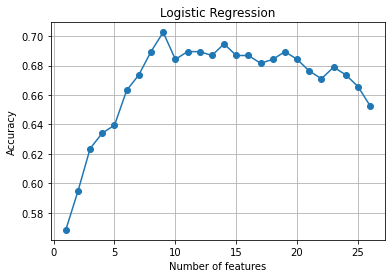

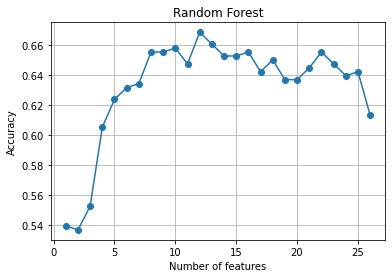

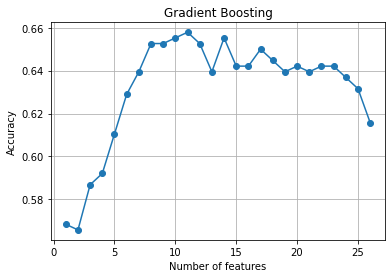

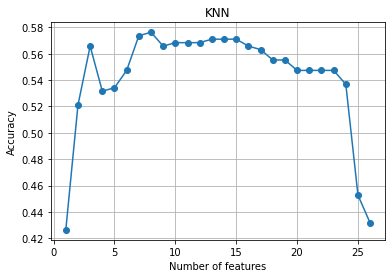

In [124]:
import matplotlib.pyplot as plt

for label, clf in zip(clf_labels, all_clf):
    sbs[label] = SBS(clf,k_features=1)
    sbs[label].fit(X_train_form,y_train)
    k_feat[label] = [len(k) for k in sbs[label].subsets_]
    plt.plot(k_feat[label], sbs[label].scores_, marker='o')
    #plt.ylim([0.3, 1.02])
    plt.title(label)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.show()

In [125]:
lr_features = list(sbs['Logistic Regression'].subsets_[20])
for idx, i in enumerate(lr_features):
    print(idx,features[i]) 

0 Away_Possession
1 Home_Shots_on_target
2 Away_Shots_on_target
3 Home_Touches
4 Away_Touches
5 Away_Clearance


In [126]:
rf_features = list(sbs['Random Forest'].subsets_[13])
for idx, i in enumerate(rf_features):
    print(idx,features[i]) 

0 Away_Possession
1 Home_Shots_on_target
2 Away_Shots_on_target
3 Away_Total_Shots
4 Home_Touches
5 Away_Touches
6 Home_Passes
7 Home_Clearance
8 Away_Clearance
9 Home_Corners
10 Home_Offsides
11 Away_Offsides
12 Away_Red_Cards


In [127]:
gb_features = list(sbs['Gradient Boosting'].subsets_[18])
for idx, i in enumerate(gb_features):
    print(idx,features[i]) 

0 Home_Possession
1 Away_Shots_on_target
2 Home_Total_Shots
3 Home_Takles
4 Home_Clearance
5 Away_Clearance
6 Home_Offsides
7 Away_Yellow_Cards


In [128]:
knn_features = list(sbs['KNN'].subsets_[24])
for idx, i in enumerate(knn_features):
    print(idx,features[i]) 

0 Away_Shots_on_target
1 Away_Clearance


In [32]:
for clf in clfs:
    clf.fit(X_train_form, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6105263157894737 



A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5921052631578947 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6052631578947368 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5026315789473684 



In [33]:
lr.fit(X_train_form[:, lr_features], y_train_form)
print('Train accuracy:', lr.score(X_train_form[:, lr_features], y_train_form))
print('Test accuracy:', lr.score(X_test_form[:, lr_features], y_test_form))

Train accuracy: 0.6473684210526316
Test accuracy: 0.5921052631578947


A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
rf.fit(X_train_form[:, rf_features], y_train_form)

print('Train accuracy:', rf.score(X_train_form[:, rf_features], y_train_form))

print('Test accuracy:', rf.score(X_test_form[:, rf_features], y_test_form))

Train accuracy: 1.0
Test accuracy: 0.5947368421052631


In [35]:
gb.fit(X_train_form[:, gb_features], y_train_form)
print('Train accuracy:', gb.score(X_train_form[:, gb_features], y_train_form))
print('Test accuracy:', gb.score(X_test_form[:, gb_features], y_test_form))

Train accuracy: 0.7717105263157895
Test accuracy: 0.5947368421052631


In [36]:
knn.fit(X_train_form[:, knn_features], y_train_form)
print('Train accuracy:', knn.score(X_train_form[:, knn_features], y_train_form))
print('Test accuracy:', knn.score(X_test_form[:, knn_features], y_test_form))

Train accuracy: 0.6144736842105263
Test accuracy: 0.45526315789473687


In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_form_std)
X_test_pca = pca.transform(X_test_form_std)
pca.explained_variance_ratio_

array([2.87400009e-01, 7.04061968e-02, 5.29644863e-02, 5.06271499e-02,
       4.69376672e-02, 4.57091221e-02, 4.28269473e-02, 4.12354443e-02,
       4.04610557e-02, 3.80038180e-02, 3.70996659e-02, 3.66591698e-02,
       3.52394304e-02, 3.32867570e-02, 2.69759059e-02, 2.60221286e-02,
       2.08143690e-02, 1.83018175e-02, 1.62833430e-02, 1.32355373e-02,
       9.98800073e-03, 8.85768113e-03, 6.64296694e-04, 2.29375003e-33,
       2.29375003e-33, 1.46606182e-33])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

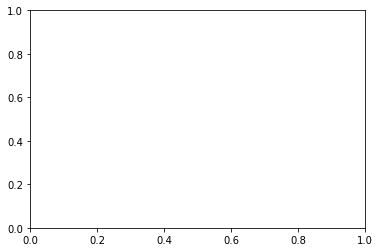

In [39]:
plt.bar(range(1, 35), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 35), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [40]:
pca = PCA(n_components = 15)

X_train_pca = pca.fit_transform(X_train_form_std)
X_test_pca = pca.transform(X_test_form_std)

for clf in clfs:
    clf.fit(X_train_pca, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_pca, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.5894736842105263 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5684210526315789 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.5947368421052631 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.531578947368421 



In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_form, y_train_form)
X_test_lda = lda.transform(X_test_form)

for clf in clfs:
    clf.fit(X_train_lda, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_lda, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.618421052631579 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.5921052631578947 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.5894736842105263 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5921052631578947 



In [42]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

X_train_kpca = kpca.fit_transform(X_train_form)
X_test_kpca = kpca.transform(X_test_form)

for clf in clfs:
    clf.fit(X_train_kpca, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_kpca, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.46842105263157896 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.2710526315789474 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.46842105263157896 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.46842105263157896 



In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

for label, clf in zip(clf_labels, all_clf):
    scores = cross_val_score(estimator=clf, X = X_train_form, y = y_train_form, cv = 10, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Accuracy: 0.64 (+/- 0.04) [Logistic Regression]
Accuracy: 0.62 (+/- 0.04) [Random Forest]
Accuracy: 0.62 (+/- 0.03) [Gradient Boosting]
Accuracy: 0.45 (+/- 0.03) [KNN]


In [44]:
eclf = VotingClassifier(estimators=[('lr',lr), ('rf',rf), ('gb',gb), ('knn',knn)], voting='hard')

scores = (estimator=eclf, X=X_train_form, y = y_train_form, cv= 10, scoring = 'accuracy')

print("Accuracy: %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std()))

SyntaxError: invalid syntax (<ipython-input-44-8e3b2ddbd20f>, line 3)

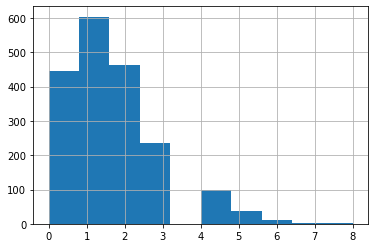

In [45]:
hometeam_eg = df['Hometeam Score'].hist()
hometeam_eg

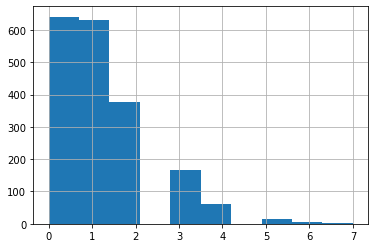

In [46]:
awayteam_eg = df['Awayteam Score'].hist()
awayteam_eg

In [47]:
df

Match_ID                 Hometeam                  Awayteam  \
0        9981                  Arsenal      West Bromwich Albion   
1        9982              Aston Villa                   Burnley   
2        9983                  Chelsea                Sunderland   
3        9984           Crystal Palace              Swansea City   
4        9985                  Everton         Tottenham Hotspur   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             63.7             36.3   
1                 0               1             63.3             36.7   
2                 3               1             64.6             35.4   
3                 1               0             47.4             52.6   
4                 0               1             40.4             59.6   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                      13                     5                24  ...   
1                       5                     3                17  ...   
2                       8                     9                24  ...   
3                       7                     2                13  ...   
4                       1                     3                 9  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                1              3                  1                  0   
1                1              1                  1                  2   
2                1              1                  2                  1   
3                2              0                  3                  0   
4                2              4                  1                  2   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  \
0                 0               0                    6                    7   
1                 0               0                   11                    6   
2                 0               0                   12                    8   
3                 0               0                   22                   13   
4                 0               0                   12                    8   
..              ...             ...

In [48]:
df.drop(columns = features_to_drop, inplace = True)
print(list(df))

['Match_ID', 'Hometeam', 'Awayteam', 'Hometeam Score', 'Awayteam Score', 'Home_Shots_on_target', 'Away_Shots_on_target', 'Home_Passes', 'Away_Pasees', 'Home_Clearance', 'Away_Clearance', 'Home_Offsides', 'Away_Offsides', 'Home_Fouls_Conceded', 'Away_Fouls_Conceded', 'Year', 'target']


In [49]:
home_attributes = ['Match_ID', 'Hometeam', 'Year'] + [a for a in list(df) if 'Home' in a]
away_attributes = ['Match_ID', 'Awayteam', 'Year'] + [a for a in list(df) if 'Away' in a]

print(home_attributes, '\n')
print(away_attributes)

['Match_ID', 'Hometeam', 'Year', 'Hometeam', 'Hometeam Score', 'Home_Shots_on_target', 'Home_Passes', 'Home_Clearance', 'Home_Offsides', 'Home_Fouls_Conceded'] 

['Match_ID', 'Awayteam', 'Year', 'Awayteam', 'Awayteam Score', 'Away_Shots_on_target', 'Away_Pasees', 'Away_Clearance', 'Away_Offsides', 'Away_Fouls_Conceded']


In [50]:
melted = []

for _, row in df.iterrows():
    home_team = [row[attr] for attr in away_attributes] + [1]
    away_team = [row[attr] for attr in home_attributes] + [0]
    melted.append(home_team)
    melted.append(away_team)

print(melted[1])

[9981, 'Arsenal', 2014, 'Arsenal', 4, 13, 637, 13, 1, 6, 0]


In [51]:
features = ['Match_ID', 'Team', 'Year'] + [a for a in list(df) if 'Home' in a] + ['IsHome']
print(features)

['Match_ID', 'Team', 'Year', 'Hometeam', 'Hometeam Score', 'Home_Shots_on_target', 'Home_Passes', 'Home_Clearance', 'Home_Offsides', 'Home_Fouls_Conceded', 'IsHome']


In [52]:
melted_df = pd.DataFrame(melted, columns = features)
melted_df

Match_ID                     Team  Year                 Hometeam  \
0         9981     West Bromwich Albion  2014     West Bromwich Albion   
1         9981                  Arsenal  2014                  Arsenal   
2         9982                  Burnley  2014                  Burnley   
3         9982              Aston Villa  2014              Aston Villa   
4         9983               Sunderland  2014               Sunderland   
...        ...                      ...   ...                      ...   
3795     38316                  Watford  2018                  Watford   
3796     38317                  Everton  2018                  Everton   
3797     38317  Wolverhampton Wanderers  2018  Wolverhampton Wanderers   
3798     38313           Leicester City  2018           Leicester City   
3799     38313        Manchester United  2018        Manchester United   

      Hometeam Score  Home_Shots_on_target  Home_Passes  Home_Clearance  \
0                  1                     5          359              14   
1                  4                    13          637              13   
2                  1                     3          319              32   
3                  0                     5          530              32   
4                  1                     9          342              23   
...              ...                   ...          ...             ...   
3795               2                     5          437              11   
3796               2                     5          409              28   
3797               2                     4          547              23   
3798               1                     4          543              14   
3799               2                     6          485              37   

      Home_Offsides  Home_Fouls_Conceded  IsHome  
0                 3                    7       1  
1                 1                    6       0  
2                 1                    6       1  
3                 1                   11       0  
4                 1                    8       1  
...             ...                  ...     ...  
3795              0                   10       0  
3796              3                    7       1  
3797              2                    8       0  
3798              2                    8       1  
3799              4                   11       0  

[3800 rows x 11 columns]

In [53]:
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, LinearRegression
regression_clfs = [LogisticRegression(), RandomForestClassifier(), 
                   Lasso(), Ridge(), BayesianRidge(), LinearRegression()]

In [54]:
scaler = StandardScaler()
# drop variables that are proxies for target
melted_df_wo = melted_df.drop(columns = ['Match_ID', 'Team', 'Hometeam', 'Year'])
print(list(melted_df_wo))

X = melted_df_wo.values
X_scaled = scaler.fit_transform(X)
y = melted_df['Hometeam Score'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 42)

melted_df

['Hometeam Score', 'Home_Shots_on_target', 'Home_Passes', 'Home_Clearance', 'Home_Offsides', 'Home_Fouls_Conceded', 'IsHome']


Match_ID                     Team  Year                 Hometeam  \
0         9981     West Bromwich Albion  2014     West Bromwich Albion   
1         9981                  Arsenal  2014                  Arsenal   
2         9982                  Burnley  2014                  Burnley   
3         9982              Aston Villa  2014              Aston Villa   
4         9983               Sunderland  2014               Sunderland   
...        ...                      ...   ...                      ...   
3795     38316                  Watford  2018                  Watford   
3796     38317                  Everton  2018                  Everton   
3797     38317  Wolverhampton Wanderers  2018  Wolverhampton Wanderers   
3798     38313           Leicester City  2018           Leicester City   
3799     38313        Manchester United  2018        Manchester United   

      Hometeam Score  Home_Shots_on_target  Home_Passes  Home_Clearance  \
0                  1                     5          359              14   
1                  4                    13          637              13   
2                  1                     3          319              32   
3                  0                     5          530              32   
4                  1                     9          342              23   
...              ...                   ...          ...             ...   
3795               2                     5          437              11   
3796               2                     5          409              28   
3797               2                     4          547              23   
3798               1                     4          543              14   
3799               2                     6          485              37   

      Home_Offsides  Home_Fouls_Conceded  IsHome  
0                 3                    7       1  
1                 1                    6       0  
2                 1                    6       1  
3                 1                   11       0  
4                 1                    8       1  
...             ...                  ...     ...  
3795              0                   10       0  
3796              3                    7       1  
3797              2                    8       0  
3798              2                    8       1  
3799              4                   11       0  

[3800 rows x 11 columns]

In [55]:
# list(melted_df)
melted_df=melted_df.drop(columns=['Hometeam'])
melted_df=melted_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
                         'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
                         'Home_Fouls_Conceded':'Fouls'})

list(melted_df)


['MatchID',
 'Team',
 'Year',
 'Score',
 'Shots',
 'Pases',
 'Clearances',
 'Offsides',
 'Fouls',
 'IsHome']

In [56]:
from sklearn.metrics import mean_squared_error

for clf in regression_clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    y_pred = clf.predict(X_test)
    print("rmse = ", mean_squared_error(y_test, y_pred) ** .5)

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'sklearn.linear_model._logistic.LogisticRegression'>
rmse =  0.09597148699373931
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
rmse =  0.15389675281277312
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
rmse =  0.973872591444983
<class 'sklearn.linear_model._ridge.Ridge'>
rmse =  0.00048747505270593127
<class 'sklearn.linear_model._bayes.BayesianRidge'>
rmse =  1.430429196885869e-12
<class 'sklearn.linear_model._base.LinearRegression'>
rmse =  1.469222487707041e-15


In [57]:
WINDOW = 10
max(melted_df.Year)

2018

In [58]:
unique_teams = melted_df[melted_df.Year == 2018].Team.unique()
unique_teams

array(['Manchester City', 'Brighton and Hove Albion', 'Arsenal',
       'Burnley', 'AFC Bournemouth', 'Crystal Palace', 'Newcastle United',
       'Fulham', 'Chelsea', 'Leicester City', 'Wolverhampton Wanderers',
       'Liverpool', 'Cardiff City', 'Manchester United',
       'Huddersfield Town', 'Southampton', 'Everton', 'Tottenham Hotspur',
       'West Ham United', 'Watford'], dtype=object)

In [59]:
#expected goals model
def build_exp_goals(df, clf):
    X = df.drop(columns = ['MatchID', 'Team', 'Year', 'Score']).values
    y = df['Score'].values
    clf.fit(X, y)
    return clf

In [60]:
goal_model = build_exp_goals(melted_df, BayesianRidge())

In [69]:
def build_stat_model(df, clf, feature = 'Score'):
    teams = df.Team.unique()
    X_as_list = []
    y_as_list = []
    for team in teams:
        team_df = df[df.Team == team]
        fit_df = team_df.drop(columns = ['MatchID', 'Team', feature])
        for i in range(0, team_df.shape[0] - WINDOW - 1):
            X_vec = fit_df.iloc[i:i + WINDOW].values.flatten()
            print(X_vec.shape)
            if X_vec.shape[0] == 70:  # must have ten games of 6 features
                # TODO: need to add indicator of current game isHome
                X_as_list.append(X_vec) 
                y_as_list.append(team_df[feature].values[i + WINDOW + 1])    
    print(X_as_list)
    # convert to vectors for model input
    X = np.vstack(X_as_list)
    y = np.array(y_as_list)
    clf.fit(X, y)
    return clf
melted_df

MatchID                     Team  Year  Score  Shots  Pases  Clearances  \
0        9981     West Bromwich Albion  2014      1      5    359          14   
1        9981                  Arsenal  2014      4     13    637          13   
2        9982                  Burnley  2014      1      3    319          32   
3        9982              Aston Villa  2014      0      5    530          32   
4        9983               Sunderland  2014      1      9    342          23   
...       ...                      ...   ...    ...    ...    ...         ...   
3795    38316                  Watford  2018      2      5    437          11   
3796    38317                  Everton  2018      2      5    409          28   
3797    38317  Wolverhampton Wanderers  2018      2      4    547          23   
3798    38313           Leicester City  2018      1      4    543          14   
3799    38313        Manchester United  2018      2      6    485          37   

      Offsides  Fouls  IsHome  
0            3      7       1  
1            1      6       0  
2            1      6       1  
3            1     11       0  
4            1      8       1  
...        ...    ...     ...  
3795         0     10       0  
3796         3      7       1  
3797         2      8       0  
3798         2      8       1  
3799         4     11       0  

[3800 rows x 10 columns]

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

model_map = {'Shots': LinearRegression(),
             'Pases': Ridge(),
             'Clearances': GradientBoostingRegressor(),
             'Offsides': Ridge(),
             'Fouls': GradientBoostingRegressor()}

for feature, clf in model_map.items():
    model_map[feature] = build_stat_model(melted_df, clf, feature)

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
[array([2014,    1,  359,   14,    3,    7,    1, 2014,    3,  422,   23,
          1,   12,    0, 2014,    1,  292,   42,    2,   17,    1, 2014,
          1,  185,   39,    0,   11,    1, 2014,    0,  236,   38,    1,
         12,    0, 2014,    2,  221,   49,    2,   17,    1, 2014,    2,
        316,   33,    0,   15,    0, 2014,    1,  455,   12,    3,    6,
          0, 2014,    0,  221,   32,    3,    5,    1, 2014,    1,  287,
         33,    1,    7,    0], dtype=int64), array([2014,    3,  422,   23,    1,   12,    0, 2014,    1,  292,   42,
          2,   17,    1, 2014,    1,  185,   39,    0,   11,    1, 2014,
          0,  236,   38,    1,   12,    0, 2014,    2,  221,   49,    2,
         17,    1, 2014,    2,  316,   33,    0,   15,    0, 2014,    1,
        455,   12,    3,    6,    0, 2014,    0,  221,   32, 

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
[array([2014,    1,    5,  359,   14,    7,    1, 2014,    3,    5,  422,
         23,   12,    0, 2014,    1,    3,  292,   42,   17,    1, 2014,
          1,    3,  185,   39,   11,    1, 2014,    0,    4,  236,   38,
         12,    0, 2014,    2,    4,  221,   49,   17,    1, 2014,    2,
          5,  316,   33,   15,    0, 2014,    1,    6,  455,   12,    6,
          0, 2014,    0,    0,  221,   32,    5,    1, 2014,    1,    5,
        287,   33,    7,    0], dtype=int64), array([2014,    3,    5,  422,   23,   12,    0, 2014,    1,    3,  292,
         42,   17,    1, 2014,    1,    3,  185,   39,   11,    1, 2014,
          0,    4,  236,   38,   12,    0, 2014,    2,    4,  221,   49,
         17,    1, 2014,    2,    5,  316,   33,   15,    0, 2014,    1,
          6,  455,   12,    6,    0, 2014,    0,    0,  221,   32,    5,
          1, 2014,    1,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,)
(70,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [71]:
st_dev_map = { feature: np.std(melted_df[feature]) for feature in model_map.keys()}
# np.std(melted_df['Shots'])
print(st_dev_map)

{'Shots': 2.4971258270503482, 'Pases': 127.98102386795814, 'Clearances': 11.021070426768947, 'Offsides': 1.622990980563882, 'Fouls': 3.452343126188686}


In [72]:
import random

def fit_game(game, df, clf_map, goal_model):
    # there is one caveat here, given relegation we need to proxy the newly promoted teams
    # of ['Brighton', 'Huddersfield', 'Newcastle']
    # with ones relegated in 2017 => ['Hull', 'Middlesbrough', 'Sunderland']
    relegated = ['Hull', 'Middlesbrough', 'Sunderland']

    # find team's previous results pull out last 10 games and vectorize
    team_df = df[df.Team == game.Team]
    print("+++++++++")
    print(team_df)
    print("+++++++++")
    if team_df.shape[0] < 10: # newly promoted team at beginning of simulation
        relegated_df = df[(df.Team == relegated[0]) | (df.Team == relegated[1]) | (df.Team == relegated[2])]
        team_df = pd.concat([relegated_df, team_df])
    
    new_row = {'MatchID': game.MatchID, 'Team': game.Team, 'Year': game.Year, 'Score': None, 'Shots': None, 
               'Pases': None, 'Clearances': None, 'Offsides': None, 'Fouls': None,
                'IsHome': game.IsHome}
    print(new_row)
    for feature in clf_map.keys():
        X = team_df.tail(WINDOW).drop(columns = ['MatchID', 'Team', 'Year', feature]).values.flatten().reshape(1,-1)
        # add randomness feature (i.e. sample from the confidence interval)
        random_noise = st_dev_map[feature] * np.random.normal()
        new_row[feature] = max(int(clf_map[feature].predict(X)[0] + random_noise), 0)
    print("=======")
    print(new_row)
    print(feature)

    goal_features = ['Shots', 'Pases', 'Clearances', 'Offsides', 'Fouls', 'IsHome']
    X_score_as_list = [ new_row[feature] for feature in goal_features ]
    print(X_score_as_list)
    
    # calculate expected goals
    X_score = np.array(X_score_as_list).reshape(1, -1)
    new_row['Score'] = int(goal_model.predict(X_score)[0])
    return new_row

In [73]:
season_df = melted_df[melted_df.Year == 2018].drop(columns = list(model_map.keys()) + ['Score'])
season_df.head()
# melted_df[melted_df.Team == 'Aston'].MatchID.unique()
# melted_df

MatchID                      Team  Year  IsHome
3040    38678           Manchester City  2018       1
3041    38678  Brighton and Hove Albion  2018       0
3042    38679                   Arsenal  2018       1
3043    38679                   Burnley  2018       0
3044    38680           AFC Bournemouth  2018       1

In [74]:
# now we'll use this dataframe to generate all the results
for row in season_df.iterrows():
    game = row[1]
    print(game)
    simulated_result = fit_game(game, melted_df, model_map, goal_model)
    simulated_df = melted_df.append(simulated_result, ignore_index = True)
    
print(melted_df.tail())


MatchID              38678
Team       Manchester City
Year                  2018
IsHome                   1
Name: 3040, dtype: object
+++++++++
      MatchID             Team  Year  Score  Shots  Pases  Clearances  \
15       9988  Manchester City  2014      2      6    475          29   
24       9978  Manchester City  2014      4     11    530          14   
45       9968  Manchester City  2014      6     11    492          31   
66       9958  Manchester City  2014      1      4    399          26   
105      9940  Manchester City  2014      3      4    428          21   
...       ...              ...   ...    ...    ...    ...         ...   
3715    38352  Manchester City  2018      3      9    736          15   
3739    38345  Manchester City  2018      2      8    767           9   
3748    38337  Manchester City  2018      1      6    644          11   
3765    38325  Manchester City  2018      6     14    760          24   
3784    38308  Manchester City  2018      2      8   

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 70 is different from 60)

In [ ]:
def get_team_points(df):
    year_df = df
    point_dict = { team: [] for team in year_df.Team.unique() } 
    match_ids = year_df.MatchID.unique()
    for match_id in match_ids:
        game = year_df[year_df.MatchID == match_id]
        result = game[['Team', 'Score']].values
        if result[0][1] == result[1][1]:
            point_dict[result[0][0]].append(1)
            point_dict[result[1][0]].append(1)
        elif result[0][1] > result[1][1]:
            point_dict[result[0][0]].append(3)
            point_dict[result[1][0]].append(0)            
        else:
            point_dict[result[0][0]].append(0)
            point_dict[result[1][0]].append(3)
            
    table = []
    for team, point_list in point_dict.items():
        table.append( (team, sum(point_list)) )
    return table

In [ ]:
points = get_team_points(simulated_df)
sorted( points, key = lambda x: -x[1])

In [ ]:
# def run_simulations(df,test_df, runs, model_map, goal_model):
#     season_df = df.drop(columns = list(model_map.keys()) + ['Score'])
#     base_df = test_df
#     season_point_totals = { team: [] for team in season_df.Team.unique() } # list of simulation results
#     print("********")
#     print(season_df)
#     print("********")
    
#     print("$$$$$$$$")
#     print(base_df)
#     print("$$$$$$$$")
#     for run in range(runs):
#         # reset simulation_df
#         run_df = base_df.copy()
#         print("---------")
#         print(run_df)
#         print("---------")
#         # run_simulation
#         for row in season_df.iterrows():
#             game = row[1]
#             print(game)
#             simulated_result = fit_game(game, run_df, model_map, goal_model)
#             run_df = run_df.append(simulated_result, ignore_index = True)
    
#         # add season result to simulation results
#         simulated_table = get_team_points(run_df)
#         for points in simulated_table:
#             season_point_totals[points[0]].append(points[1])
        
#     return [ (team, sum(point_totals)/len(point_totals)) for team, point_totals in season_point_totals.items() ]

def run_simulations(df, runs, model_map, goal_model):
    season_df = df[df.Year == 2018].drop(columns = list(model_map.keys()) + ['Score'])
    base_df = df[df.Year == 2017]
    season_point_totals = { team: [] for team in season_df.Team.unique() } # list of simulation results
    
    for run in range(runs):
        
        # reset simulation_df
        run_df = base_df.copy()
    
        # run_simulation
        for row in season_df.iterrows():
            game = row[1]
            simulated_result = fit_game(game, run_df, model_map, goal_model)
            run_df = run_df.append(simulated_result, ignore_index = True)
    
        # add season result to simulation results
        simulated_table = get_team_points(run_df)
        for points in simulated_table:
            season_point_totals[points[0]].append(points[1])
        
    return [ (team, sum(point_totals)/len(point_totals)) for team, point_totals in season_point_totals.items() ]

In [ ]:
data = pd.read_csv(os.getcwd() + '/Data/2016-17Season.csv')
data['Hometeam Goal Diff'] = data[['Hometeam Score', 'Awayteam Score']].apply(hometeam_gd, axis=1)
data['Awayteam Goal Diff'] = data[['Hometeam Score', 'Awayteam Score']].apply(awayteam_gd, axis=1)
data['target'] = data[['Hometeam Score', 'Awayteam Score']].apply(convert_score_to_numerical, axis=1)
df = pd.DataFrame(data)
df

In [ ]:
melted_df

In [ ]:
df = df.drop(columns=['Home_Possession', 'Away_Possession', 'Home_Total_Shots', 
                'Away_Total_Shots', 'Home_Takles', 'Away_Takles', 'Home_Corners',
                'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
                'Away_Red_Cards', 'Hometeam Goal Diff', 'Awayteam Goal Diff',
                'Home_Touches', 'Away_Touches'])

In [ ]:
melted = []

for _, row in df.iterrows():
    home_team = [row[attr] for attr in away_attributes] + [1]
    away_team = [row[attr] for attr in home_attributes] + [0]
    melted.append(home_team)
    melted.append(away_team)

# for i in melted:
#     i.remove(i[1])

print(melted[0])

# # melted_test_df=melted_test_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
# #                          'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
# #                          'Home_Fouls_Conceded':'Fouls'})

features = ['Match_ID', 'Team'] + [a for a in list(df) if 'Home' in a] + ['IsHome']
print(features)
# for i in features:
#     if 'Home' in i:
#         features.remove(i)
# print(features)

# # print(list(melted_test_df))
melted_test_df = pd.DataFrame(melted, columns = features)
melted_test_df = melted_test_df.drop(columns=['Hometeam'])
melted_test_df
# # print(melted)

# melted_test_df = pd.DataFrame(melted, columns=features)
# melted_test_df
# print(melted[0])

In [ ]:
drop=[]

# melted_test_df=melted_test_df.drop(columns=['Hometeam'])

melted_test_df=melted_test_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
                         'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
                         'Home_Fouls_Conceded':'Fouls'})

# for i in list(melted_test_df):
#     if '_' in i:
#         drop.append(i)

# print(drop)
# melted_test_df=melted_test_df.drop(columns=drop)
melted_test_df

In [ ]:
RUNS = 20
avg_table = run_simulations(melted_df, RUNS, model_map, goal_model)

sorted(avg_table, key = lambda x: -x[1])